<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [2]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

In [8]:
num_heads = sum(boolean_list_out)
num_heads

196

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import beta
from scipy.stats import binom
import json
import os

def posterior_pdf(p, num_heads, num_flips):
    likelihood_pdf = binom.pmf(num_heads, num_flips, p)
    prior_pdf = 1 / num_flips
    posterior_pdf = prior_pdf * likelihood_pdf # Using Bayes' Theorem
    posterior_pdf /= np.sum(posterior_pdf) # Normalize
    return posterior_pdf
    
def count_flips_in_json(json_path):
    with open(json_path, 'r') as json_file:
        bool_list_out = json.load(json_file)
    num_heads = sum(bool_list_out)
    num_flips = len(bool_list_out)
    return num_heads, num_flips

# Numerically calculate expectation value and variance of each posterior distribution.
import scipy.integrate as spi

def exp_x(bias_values, posterior_arr):
    return np.sum(bias_values * posterior_arr)

def exp_x2(bias_values, posterior_arr):
    return np.sum(bias_values ** 2 * posterior_arr)
           
def variance(bias_values, posterior_arr):
    return exp_x2(bias_values, posterior_arr) - exp_x(bias_values, posterior_arr) ** 2

dataset_1.json <p>=0.3924 Variance=0.0005 Heads: 196
dataset_2.json <p>=0.4064 Variance=0.0005 Heads: 203
dataset_3.json <p>=0.2849 Variance=0.0004 Heads: 142


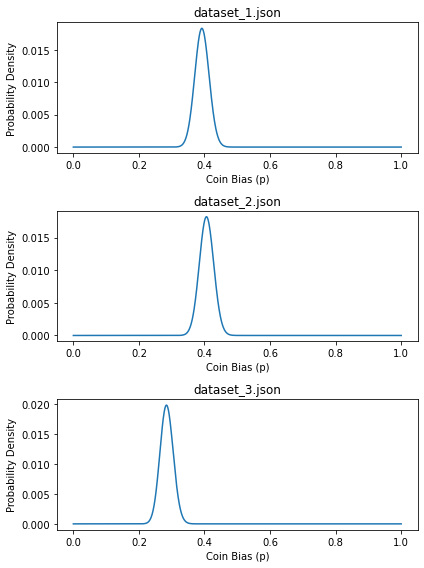

In [120]:
root_dir = './problem_1/'
file_paths = [file_path for file_path in os.listdir(root_dir) if '.json' in file_path]
counts = [count_flips_in_json(root_dir + file_path) for file_path in file_paths]

bias_values = np.linspace(0, 1, 1000)

# Plot posterior PDFs for each dataset in a (3, 1) format
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

for (i, (file_path, (num_heads, num_flips))) in enumerate(zip(file_paths, counts)):
    current_posterior_pdf = posterior_pdf(bias_values, num_heads, num_flips)
    axes[i].plot(bias_values, current_posterior_pdf, label=file_path)
    axes[i].set_title(file_path)
    axes[i].set_xlabel('Coin Bias (p)')
    axes[i].set_ylabel('Probability Density')
    print(file_path, f'<p>={exp_x(bias_values, current_posterior_pdf):.4f}', f'Variance={variance(bias_values, current_posterior_pdf):.4f}', 'Heads:', num_heads)

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

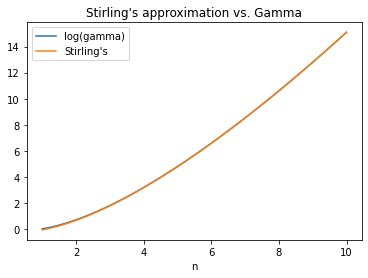

In [138]:
from scipy.special import gamma

n_values = np.linspace(1, 10, 1000)

def stirling_approx(n):
    return n * np.log(n) - n + (1/2) * np.log(2 * np.pi * n)

plt.plot(n_values, np.log(gamma(n_values + 1)), label="log(gamma)")
plt.plot(n_values, stirling_approx(n_values), label="Stirling's")
plt.legend()
plt.xlabel('n')
plt.title("Stirling's approximation vs. Gamma")
plt.show()

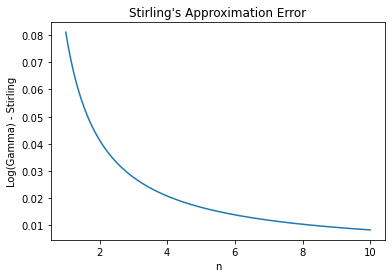

In [142]:
plt.plot(n_values, np.log(gamma(n_values + 1)) - stirling_approx(n_values))
plt.xlabel('n')
plt.ylabel("Log(Gamma) - Stirling")
plt.title("Stirling's Approximation Error")
plt.show()

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
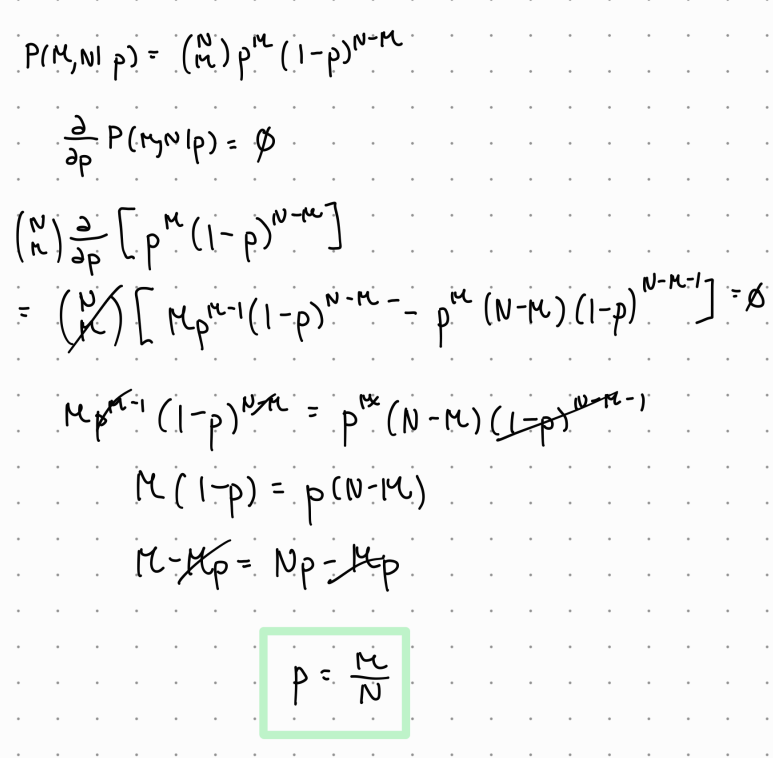
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
<br>**Data set 1: 196/500**<br> **Data set 2: 203/500** <br>**Data set 3: 142/500**
<br>


## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

In [159]:
def frequentist_interference(sample_size, file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    sample = np.random.choice(data, sample_size, replace=True)
    
    num_heads = np.sum(sample)
    num_flips = len(sample)
    
    p_values = np.linspace(0, 1, 1000)
    likelihood_pdf = binom.pmf(num_heads, num_flips, p_values)
    mle = bias_values[np.argmax(likelihood_pdf)]
    
    return (likelihood_pdf, mle)

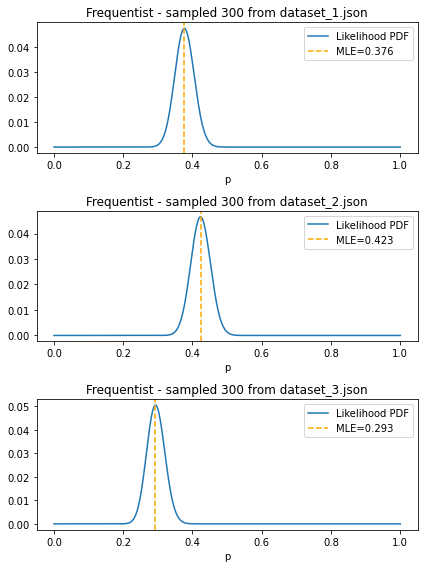

In [178]:
root_dir = 'problem_1/'

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

for (i, file_path) in enumerate(['dataset_1.json', 'dataset_2.json', 'dataset_3.json']):
    likelihood_pdf, mle = frequentist_interference(300, root_dir + file_path)
    p_values = np.linspace(0, 1, 1000)
    axes[i].plot(p_values, likelihood_pdf, label="Likelihood PDF")
    axes[i].axvline(x=mle, color='orange', linestyle='--', label=f'MLE={mle:.3f}')

    axes[i].set_title('Frequentist - sampled 300 from ' + file_path)
    axes[i].set_xlabel('p')
    axes[i].legend()

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

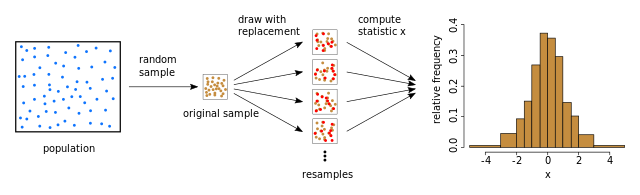
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Processing dataset_1...
=== Bootstrap w/ sample size of 5 ===
Expectation Value: 0.38400
Variance: 0.04774
=== Bootstrap w/ sample size of 15 ===
Expectation Value: 0.37933
Variance: 0.01891
=== Bootstrap w/ sample size of 40 ===
Expectation Value: 0.37200
Variance: 0.00488
=== Bootstrap w/ sample size of 60 ===
Expectation Value: 0.39283
Variance: 0.00350
=== Bootstrap w/ sample size of 90 ===
Expectation Value: 0.39822
Variance: 0.00270
=== Bootstrap w/ sample size of 150 ===
Expectation Value: 0.39500
Variance: 0.00177
=== Bootstrap w/ sample size of 210 ===
Expectation Value: 0.39557
Variance: 0.00108
=== Bootstrap w/ sample size of 300 ===
Expectation Value: 0.39130
Variance: 0.00097
=== Bootstrap w/ sample size of 400 ===
Expectation Value: 0.39213
Variance: 0.00069


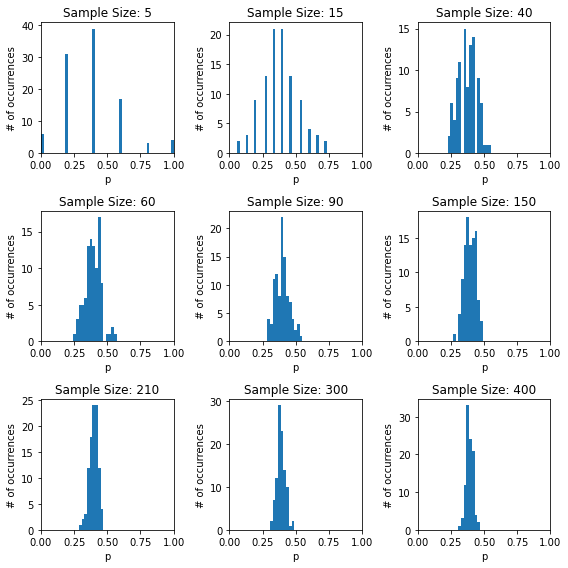

Processing dataset_2...
=== Bootstrap w/ sample size of 5 ===
Expectation Value: 0.41200
Variance: 0.05186
=== Bootstrap w/ sample size of 15 ===
Expectation Value: 0.41133
Variance: 0.01289
=== Bootstrap w/ sample size of 40 ===
Expectation Value: 0.41000
Variance: 0.00664
=== Bootstrap w/ sample size of 60 ===
Expectation Value: 0.40267
Variance: 0.00323
=== Bootstrap w/ sample size of 90 ===
Expectation Value: 0.41189
Variance: 0.00243
=== Bootstrap w/ sample size of 150 ===
Expectation Value: 0.40647
Variance: 0.00176
=== Bootstrap w/ sample size of 210 ===
Expectation Value: 0.41090
Variance: 0.00115
=== Bootstrap w/ sample size of 300 ===
Expectation Value: 0.40860
Variance: 0.00072
=== Bootstrap w/ sample size of 400 ===
Expectation Value: 0.40575
Variance: 0.00055


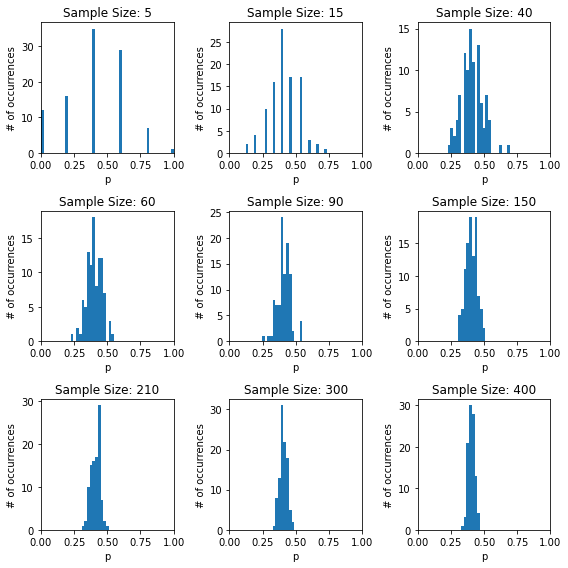

Processing dataset_3...
=== Bootstrap w/ sample size of 5 ===
Expectation Value: 0.29800
Variance: 0.03720
=== Bootstrap w/ sample size of 15 ===
Expectation Value: 0.28533
Variance: 0.01370
=== Bootstrap w/ sample size of 40 ===
Expectation Value: 0.28675
Variance: 0.00461
=== Bootstrap w/ sample size of 60 ===
Expectation Value: 0.28167
Variance: 0.00534
=== Bootstrap w/ sample size of 90 ===
Expectation Value: 0.28056
Variance: 0.00217
=== Bootstrap w/ sample size of 150 ===
Expectation Value: 0.28033
Variance: 0.00135
=== Bootstrap w/ sample size of 210 ===
Expectation Value: 0.28500
Variance: 0.00087
=== Bootstrap w/ sample size of 300 ===
Expectation Value: 0.28437
Variance: 0.00062
=== Bootstrap w/ sample size of 400 ===
Expectation Value: 0.28175
Variance: 0.00056


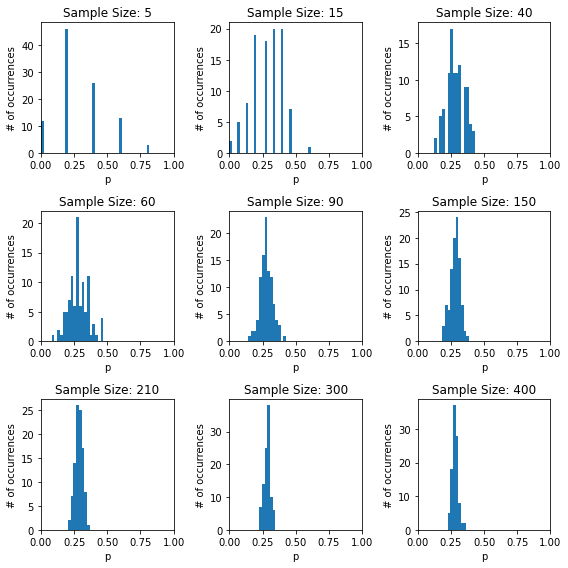

In [8]:
def bootstrap_100_times(json_path, num_draws):
    with open(json_path, 'r') as json_file:
        bool_list_out = json.load(json_file)
    
    return np.array([np.mean(np.random.choice(bool_list_out, num_draws, replace=True)) for i in range(100)])

def hist_bootstrap(axes, i, j, bootstrap_list, num_draws):
    axs = axes[i][j]
    axs.hist(bootstrap_list, bins=np.linspace(0, 1, 50))
    axs.set_xlim(0, 1)
    axs.set_xlabel('p')
    axs.set_ylabel('# of occurrences')
    axs.set_title(f'Sample Size: {num_draws}')

def stats_bootstrap(bootstrap_list, num_draws):
    expectation_value = np.mean(bootstrap_list)
    variance = np.std(bootstrap_list) ** 2
    print(f'=== Bootstrap w/ sample size of {num_draws} ===')
    print(f'Expectation Value: {expectation_value:.5f}')
    print(f'Variance: {variance:.5f}')
    return expectation_value, variance

dataset_stats = {'dataset_1': {'variances': 0,
                               'means': 0},
                 'dataset_2': {'variances': 0,
                               'means': 0},
                 'dataset_3': {'variances': 0,
                               'means': 0}}

sample_sizes = [[5, 15, 40],
                [60, 90, 150],
                [210, 300, 400]]

for path in ['dataset_1', 'dataset_2', 'dataset_3']:
    json_path = 'problem_1/' + path + '.json'
    
    print('Processing ' + path + '...')

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    means = []
    variances = []

    for i in range(3):
        for j in range(3):
            num_draws = sample_sizes[i][j]
            bootstrap_list = bootstrap_100_times(json_path, num_draws)
            hist_bootstrap(axes, i, j, bootstrap_list, num_draws)
            (mean, variance) = stats_bootstrap(bootstrap_list, num_draws)
            variances.append(variance)
            means.append(mean)
            
    dataset_stats[path]['variances'] = variances
    dataset_stats[path]['means'] = means

    plt.tight_layout()
    plt.show()

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

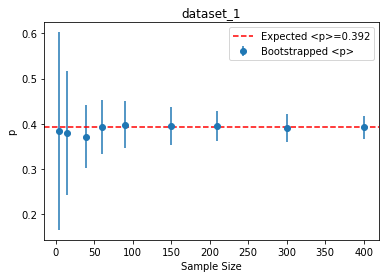

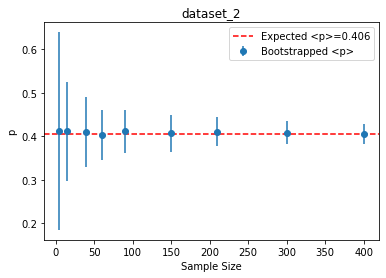

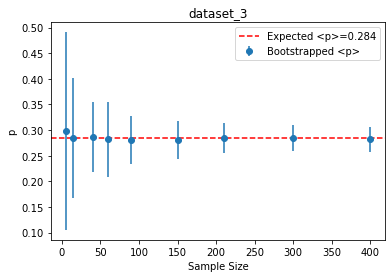

In [37]:
flattened_sample_sizes = [element for row in sample_sizes for element in row]

datasets = ['dataset_1', 'dataset_2', 'dataset_3']
expected_ps = np.array([196, 203, 142])/500

for dataset, expected_p in zip(datasets, expected_ps):
    stdevs = np.sqrt(dataset_stats[dataset]['variances'])
    means = dataset_stats[dataset]['means']

    plt.errorbar(flattened_sample_sizes, means, yerr=stdevs, linestyle=' ', marker='o', label='Bootstrapped <p>')
    plt.xlabel('Sample Size')
    plt.ylabel('p')
    plt.axhline(y=expected_p, color='red', linestyle='--', label=f'Expected <p>={expected_p}')
    plt.legend()
    plt.title(dataset)
    plt.show()

As the sample size, increases the bootstrap mean and variance converges on the expected $<p>$. This is what I expected, because as the bootstrap sample size increases, the statistics become closer to the consensus statistics.

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant, fixed_position):
        self.decay_constant = decay_constant
        self.fixed_position = fixed_position

    def pdf_decay(self, x):
        decay_constant = self.decay_constant
        Z = np.exp(- 1 / decay_constant)
        return (1 / Z) * (1 / decay_constant) * np.exp(- x / decay_constant)
    
    def pdf_fixed_position(self, decay_constant):
        return (self.fixed_position) * (1 / decay_constant ** 2) * np.exp(- self.fixed_position / decay_constant)
        
    def plot_pdf(self, xlim):
        x_values = np.linspace(1, xlim, 1000)
        plt.plot(x_values, self.pdf_decay(x_values), label=f"$\lambda$ = {self.decay_constant}")
        
        plt.savefig(output_path, format = '.png')

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

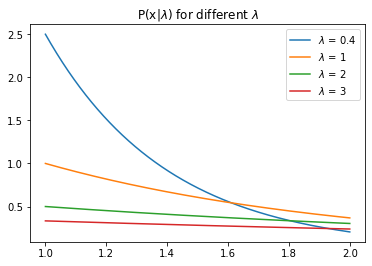

In [123]:
particles = [Particle(decay_constant, None) for decay_constant in [0.4, 1, 2, 3]]
[particle.plot_pdf(2) for particle in particles]
plt.title('P(x|$\lambda$) for different $\lambda$')
plt.legend()
plt.show()

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

Make the ansatz that P($\lambda$ | x) is of the form $\frac{1}{\lambda^2} e^\left(-x/\lambda\right)$ to fix the divergent behavior at $\lambda \rightarrow \infty$. This is normalized by Z(x) = 1/x.

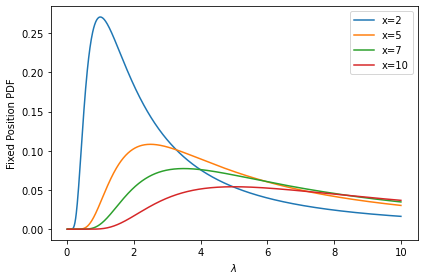

In [124]:
particles = [Particle(None, fixed_position) for fixed_position in [2, 5, 7, 10]]
lambda_values = np.linspace(0.01, 10, 1000)

for particle in particles:
    plt.plot(lambda_values, particle.pdf_fixed_position(lambda_values), label=f"x={particle.fixed_position}")
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('Fixed Position PDF')

plt.tight_layout()
plt.show()

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


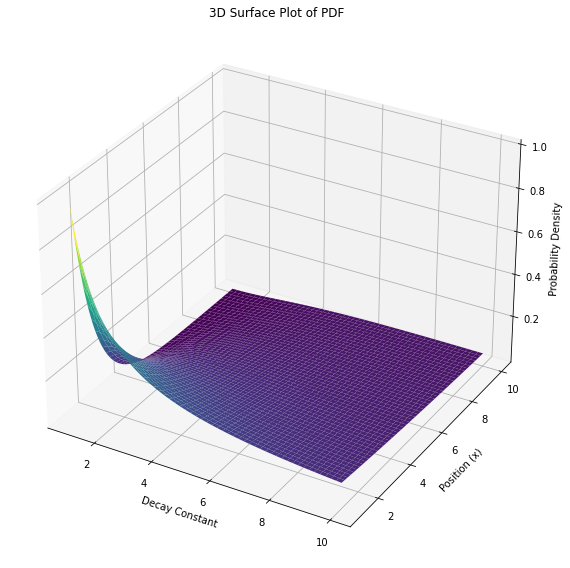

In [55]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Credit to Brian Arevalo for helping me w/ this...
def pdf_decay(x, decay_constant):
    Z = np.exp(- 1 / decay_constant)
    return (1 / Z) * (1 / decay_constant) * np.exp(- x / decay_constant)

x_range = np.linspace(1, 10, 1000)
decay_constant_range = np.linspace(1, 10, 1000)

pdf_values = np.zeros((len(x_range), len(decay_constant_range)))

for i, x in enumerate(x_range):
    for j, decay_constant in enumerate(decay_constant_range):
        pdf_values[i, j] = pdf_decay(x, decay_constant)

X, Y = np.meshgrid(decay_constant_range, x_range)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, pdf_values, cmap='viridis')

ax.set_xlabel('Decay Constant')
ax.set_ylabel('Position (x)')
ax.set_zlabel('Probability Density')
ax.set_title('3D Surface Plot of PDF')

plt.tight_layout()
plt.savefig('problem_2_surface_plot.png', bbox_inches='tight', dpi=300) # Image is getting cut off and I don't know why...
plt.show()

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




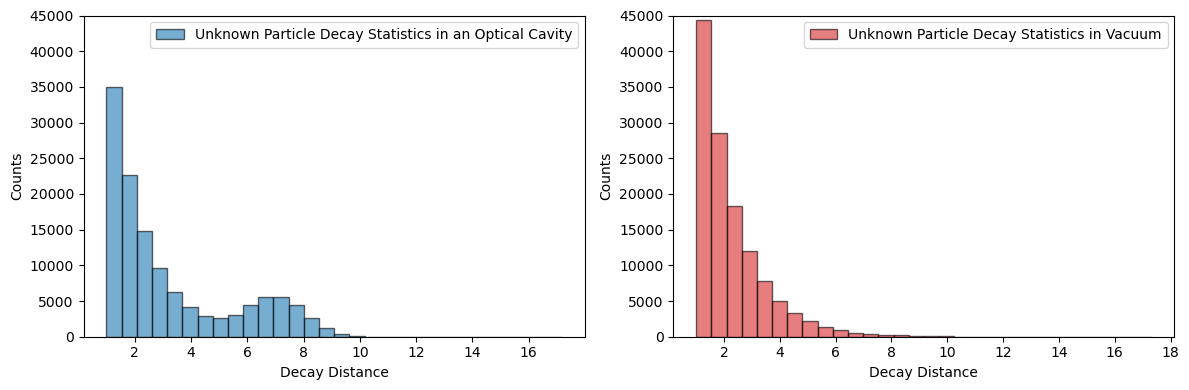

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

=== Vacuum Decay Fit ===
Decay Constant: 1.240


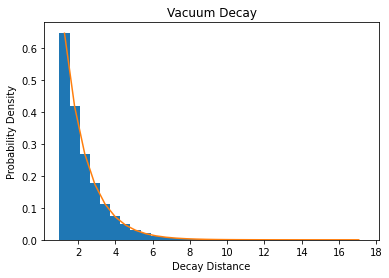

In [134]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


import json
from scipy.optimize import curve_fit

def decay_fit(x, decay_constant):
    Z = np.exp(- 1 / decay_constant)
    return (1 / Z) * (1 / decay_constant) * np.exp(- x / decay_constant)

def decay_fit_with_gaussian(x, decay_constant, mu, sigma, a, b):
    return a * decay_fit(x, decay_constant) + b * sp.stats.norm.pdf(x, mu, sigma)

with open('problem_2/Vacuum_decay_dataset.json', 'r') as file:
    data = json.load(file)

plt.hist(data, bins=30, density=True)
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

params, covariance = curve_fit(decay_fit, bin_centers, hist, p0=(1.0))
decay_constant = params[0]
plt.plot(bin_centers, decay_fit(bin_centers, decay_constant))
plt.xlabel('Decay Distance')
plt.ylabel('Probability Density')
plt.title('Vacuum Decay')
print('=== Vacuum Decay Fit ===')
print(f'Decay Constant: {decay_constant:.3f}')

=== Cavity Decay Fit ===
Decay Constant: 1.257
mu: 7.005
sigma: 1.016


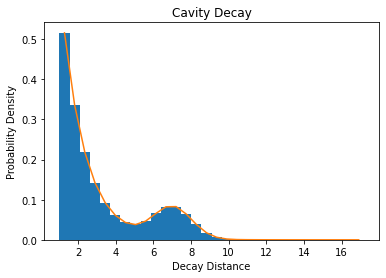

In [133]:
with open('problem_2/Cavity_decay_dataset.json', 'r') as file:
    data = json.load(file)

plt.hist(data, bins=30, density=True)
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

params, covariance = curve_fit(decay_fit_with_gaussian, bin_centers, hist, p0=(0.5, 7, 0.5, 1, 0.5))
decay_constant, mu, sigma, _, _ = params
plt.plot(bin_centers, decay_fit_with_gaussian(bin_centers, *params))
plt.xlabel('Decay Distance')
plt.ylabel('Probability Density')
plt.title('Cavity Decay')
print('=== Cavity Decay Fit ===')
print(f'Decay Constant: {decay_constant:.3f}')
print(f'mu: {mu:.3f}')
print(f'sigma: {sigma:.3f}')

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,

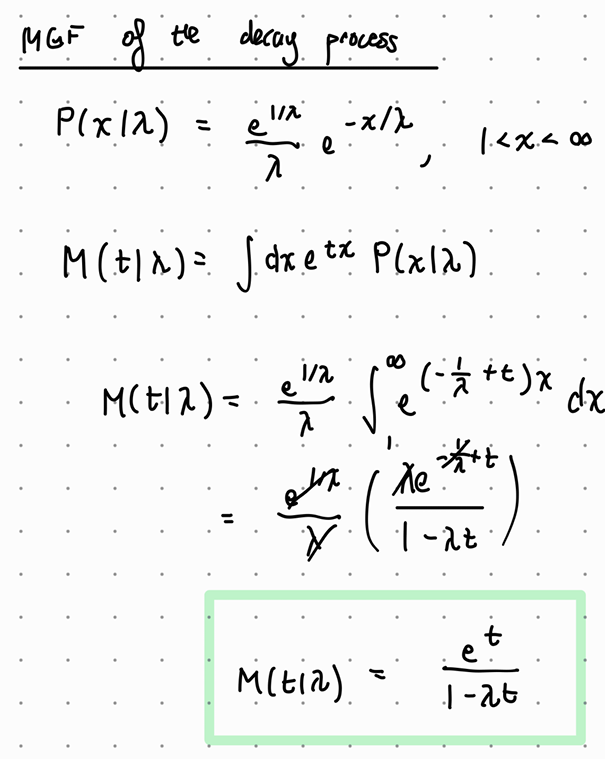

## B) 
Using the above result, calculate the mean and variance **analytically**,

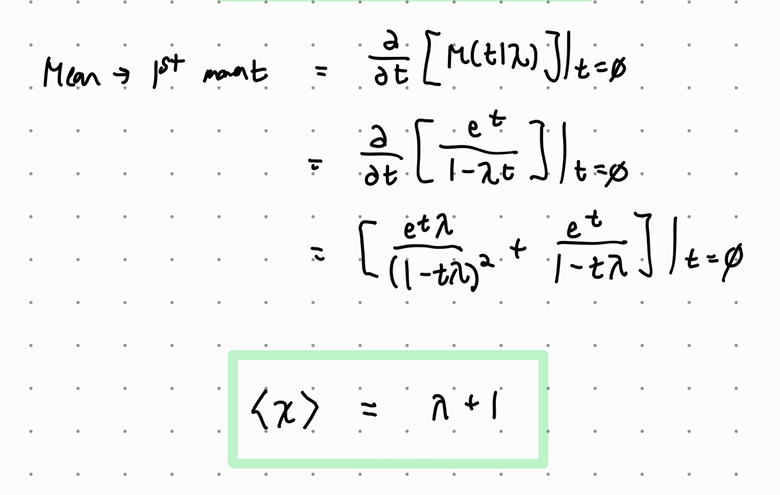
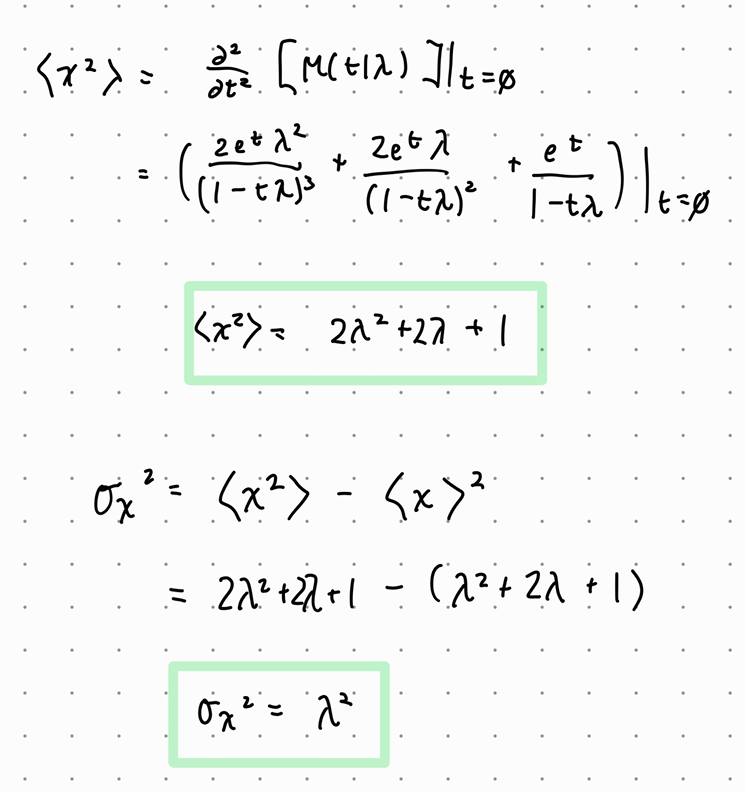

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

In [125]:
def MGF(t, decay_constant):
    return np.exp(t) * (1 / (1 - decay_constant * t))

In [50]:
import numpy as np
import matplotlib.pyplot as plt

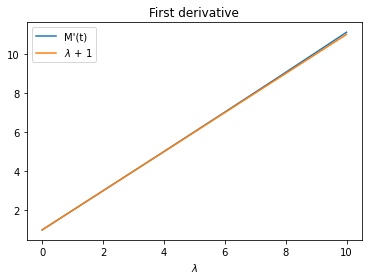

In [54]:
decay_constants = np.linspace(0, 10, 1000)
first_derivative = (MGF(0.01, decay_constants) - MGF(-0.01, decay_constants)) / (2 * 0.01)
exp_x = decay_constants + 1

plt.plot(decay_constants, first_derivative, label="M'(t)")
plt.plot(decay_constants, exp_x, label="$\lambda$ + 1")
plt.title('First derivative')
plt.xlabel("$\lambda$")
plt.legend()
plt.show()

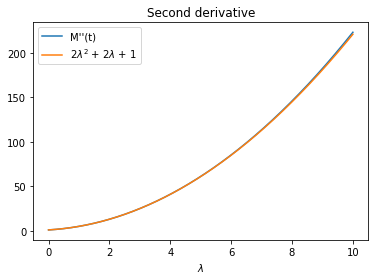

In [52]:
second_derivative = (MGF(0.01, decay_constants) + MGF(-0.01, decay_constants) - 2 * MGF(0, decay_constants)) / ((0.01) ** 2) # From limit def of second derivative
exp_xsq = 2 * decay_constants ** 2 + 2 * decay_constants + 1

plt.plot(decay_constants, second_derivative, label="M''(t)")
plt.plot(decay_constants, exp_xsq , label="2$\lambda^2$ + 2$\lambda$ + 1")
plt.legend()
plt.title('Second derivative')
plt.xlabel("$\lambda$")
plt.show()

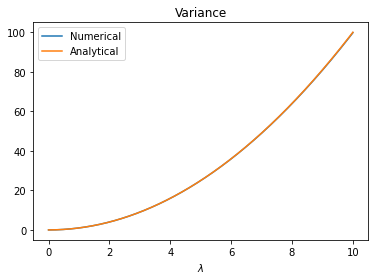

In [53]:
variance_from_derivatives = second_derivative - first_derivative ** 2
variance_from_exp = exp_xsq - exp_x ** 2

plt.plot(decay_constants, variance_from_derivatives, label="Numerical")
plt.plot(decay_constants, variance_from_exp, label="Analytical")
plt.title("Variance")
plt.xlabel("$\lambda$")
plt.legend()
plt.show()

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
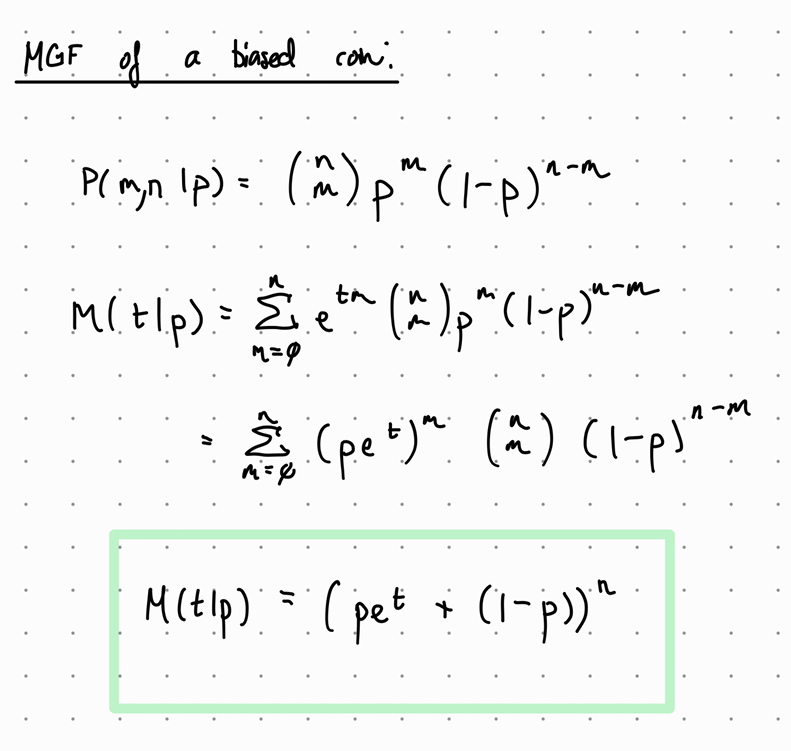

Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,

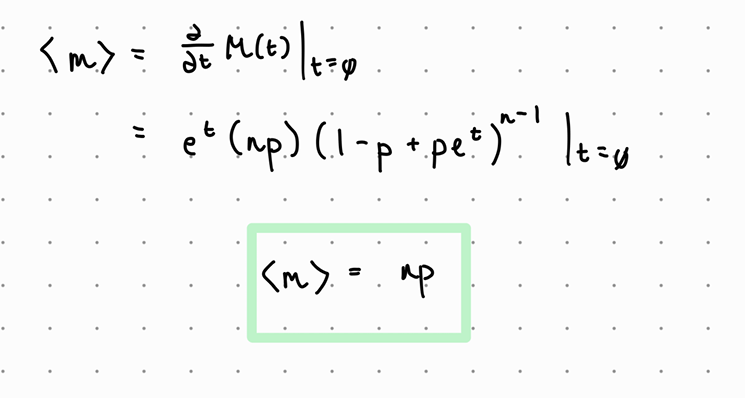
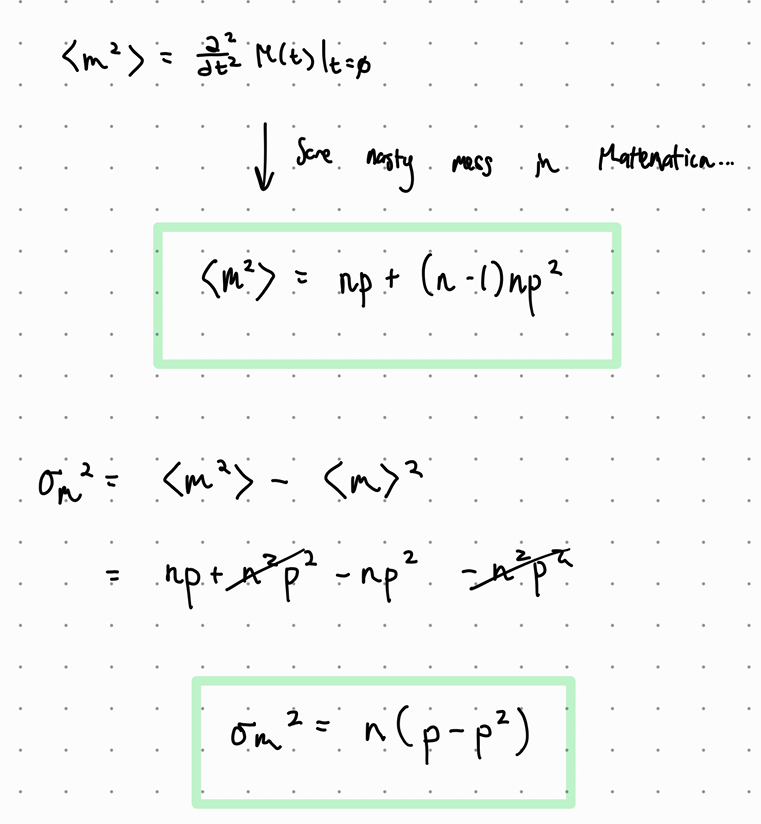

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

In [84]:
def MGF(t, p, n=500):
    return (p * np.exp(t) + (1 - p)) ** n

n = 500
h = 1e-6

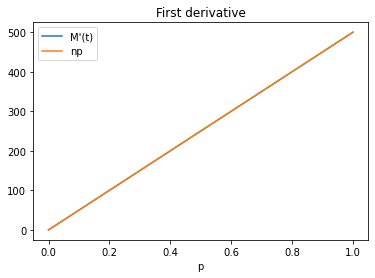

In [85]:
p_values = np.linspace(0, 1, 1000)
first_derivative = (MGF(h, p_values) - MGF(-h, p_values)) / (2 * h)
exp_m = n * p_values

plt.plot(p_values, first_derivative, label="M'(t)")
plt.plot(p_values, exp_m, label="np")
plt.title('First derivative')
plt.xlabel("p")
plt.legend()
plt.show()

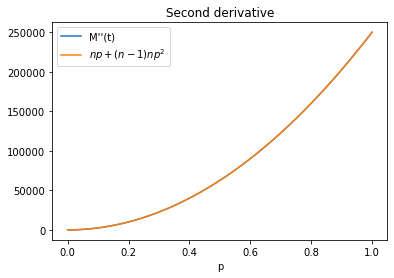

In [86]:
second_derivative = (MGF(h, p_values) + MGF(-h, p_values) - 2 * MGF(0, p_values)) / ((h) ** 2) # From limit def of second derivative
exp_msq = n * p_values + (n - 1) * n * p_values ** 2

plt.plot(p_values, second_derivative, label="M''(t)")
plt.plot(p_values, exp_msq , label="$np + (n-1)np^2$")
plt.legend()
plt.title('Second derivative')
plt.xlabel("p")
plt.show()

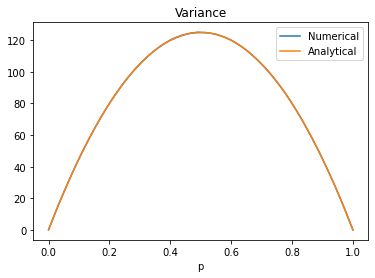

In [88]:
variance_from_derivatives = second_derivative - first_derivative ** 2
variance_from_exp = exp_msq - exp_m ** 2

plt.plot(p_values, variance_from_derivatives, label="Numerical")
plt.plot(p_values, variance_from_exp, label="Analytical")
plt.title("Variance")
plt.xlabel("p")
plt.legend()
plt.show()